<h1 align="center">Exploratory Data Analysis</h1>

In [47]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['font.size'] = 10
# set font of xstics and ystics
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# 1. Trực quan hóa dữ liệu sau khi cào và làm sạch

In [48]:
data = pd.read_csv('clean_data_10k.csv')
data.head()

,price,brand,ram,ram_type,display_size,display_type,resolution,screen_rate,screen_panel,length,width,thickness,cpu_brand,gpu_brand,ssd,os,weight,cpu_point,gpu_point,features
0,3629.00,ASUS,64.0,DDR5,15.6,FHD,1920 x 1080,144.0,IPS,354.00,251.00,19.90,INTEL,NVIDIA,2000.0,WINDOWS,2.00,13001.0,NaN,FINGERPRINT READER
1,3049.99,LENOVO,64.0,DDR5,15.6,QHD,2560 x 1440,165.0,IPS,358.80,262.35,19.99,INTEL,NVIDIA,2000.0,WINDOWS,2.40,15486.0,8841.0,FINGERPRINT READER
2,1819.00,ACER,32.0,DDR5,15.6,FHD,1920 x 1080,144.0,IPS,360.40,271.10,25.90,INTEL,NVIDIA,2000.0,WINDOWS,2.50,15486.0,8864.0,FINGERPRINT READER
3,2359.99,ACER,32.0,DDR4,16.0,WQXGA,2560 x 1600,165.0,IPS,358.14,261.62,19.81,INTEL,NVIDIA,1000.0,WINDOWS,2.44,12390.0,8290.0,FINGERPRINT READER
4,1309.99,HP,64.0,DDR4,15.6,HD,1366 x 768,NaN,TN,358.00,242.00,17.90,INTEL,INTEL,2000.0,WINDOWS,1.70,NaN,1097.0,WEB CAMERA


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         8636 non-null   float64
 1   brand         8636 non-null   object 
 2   ram           8636 non-null   float64
 3   ram_type      8635 non-null   object 
 4   display_size  8622 non-null   float64
 5   display_type  8621 non-null   object 
 6   resolution    8622 non-null   object 
 7   screen_rate   2667 non-null   float64
 8   screen_panel  8622 non-null   object 
 9   length        8592 non-null   float64
 10  width         8588 non-null   float64
 11  thickness     8588 non-null   float64
 12  cpu_brand     8636 non-null   object 
 13  gpu_brand     8636 non-null   object 
 14  ssd           8579 non-null   float64
 15  os            8617 non-null   object 
 16  weight        8636 non-null   float64
 17  cpu_point     7900 non-null   float64
 18  gpu_point     7462 non-null 

Thông tin về các cột trong bộ dữ liệu:
- Tổng số dòng: 8636
- Tổng số cột: 20 (11 cột số và 9 cột category)

| STT | Tên cột | Ý nghĩa |
| --- | --- | --- |
| 1 | price | Giá bán của laptop (USD) |
| 2 | brand | Nhà sản xuất |
| 3 | ram | Dung lượng RAM (GB) |
| 4 | ram_type | Loại RAM |
| 5 | display_size | Kích thước màn hình (inch) |
| 6 | display_type | Loại màn hình (HD/FHD,...) |
| 7 | resolution | Độ phân giải |
| 8 | screen_rate | Tần số quét (Hz) |
| 9 | screen_panel | Tấm nền màn hình (IPS/TN/VA,...) |
| 10 | length | Chiều dài (mm) |
| 11 | width | Chiều rộng (mm) |
| 12 | thickness | Độ dày (mm) |
| 13 | cpu_brand | Nhà sản xuất CPU |
| 14 | gpu_brand | Nhà sản xuất GPU |
| 15 | ssd | Dung lượng SSD (GB) |
| 16 | os | Hệ điều hành |
| 17 | weight | Trọng lượng (kg) |
| 18 | cpu_point | Điểm CPU |
| 19 | gpu_point | Điểm GPU |
| 20 | features | Tính năng |

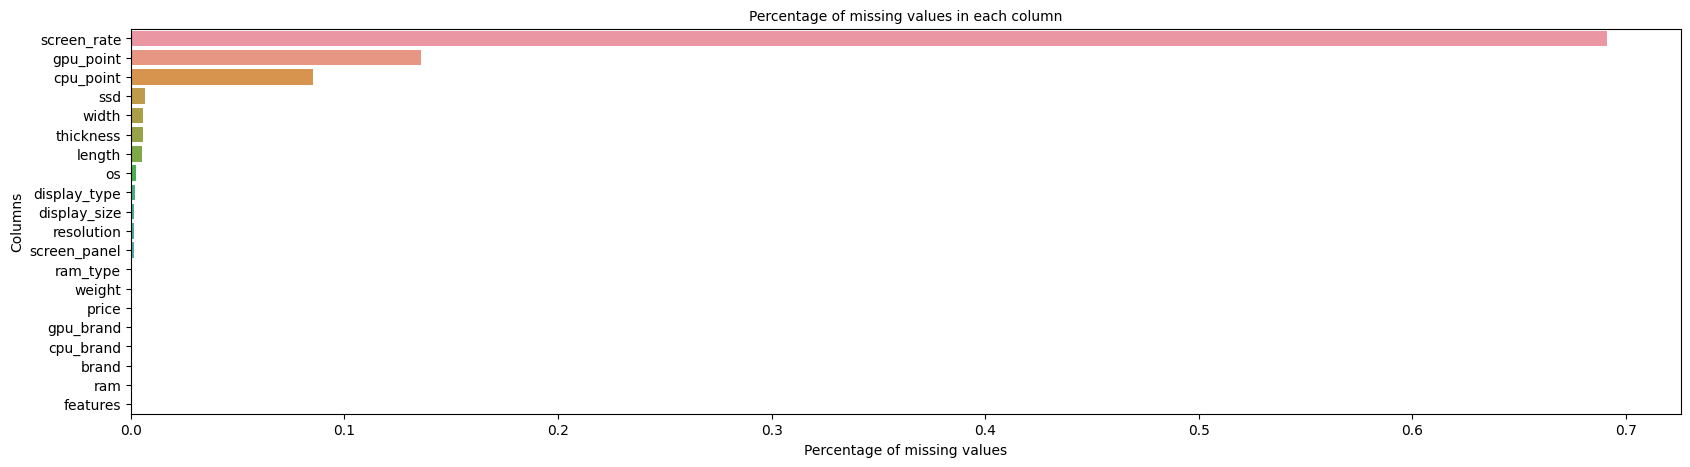

In [50]:
# plot percentage of missing values in each column using barplot sort by percentage of missing values
plt.figure(figsize=(20, 5))
sns.barplot(x=data.isnull().sum().sort_values(ascending=False)/len(data), y=data.isnull().sum().sort_values(ascending=False).index)
plt.title('Percentage of missing values in each column')
plt.xlabel('Percentage of missing values')
plt.ylabel('Columns')
# plt.xticks(rotation=90)
plt.show()

In [51]:
# print number of missing values in each column
print('Number of missing values in each column:')
print(data.isnull().sum().sort_values(ascending=False))

Number of missing values in each column:
screen_rate     5969
gpu_point       1174
cpu_point        736
ssd               57
width             48
thickness         48
length            44
os                19
display_type      15
display_size      14
resolution        14
screen_panel      14
ram_type           1
weight             0
price              0
gpu_brand          0
cpu_brand          0
brand              0
ram                0
features           0
dtype: int64


## 2. Trực quan dữ liệu dạng category

In [52]:
# get categorical columns
cat_cols = data.select_dtypes(include=['object']).columns
print('Categorical columns:')
for col in cat_cols:
    print(col)

Categorical columns:
brand
ram_type
display_type
resolution
screen_panel
cpu_brand
gpu_brand
os
features


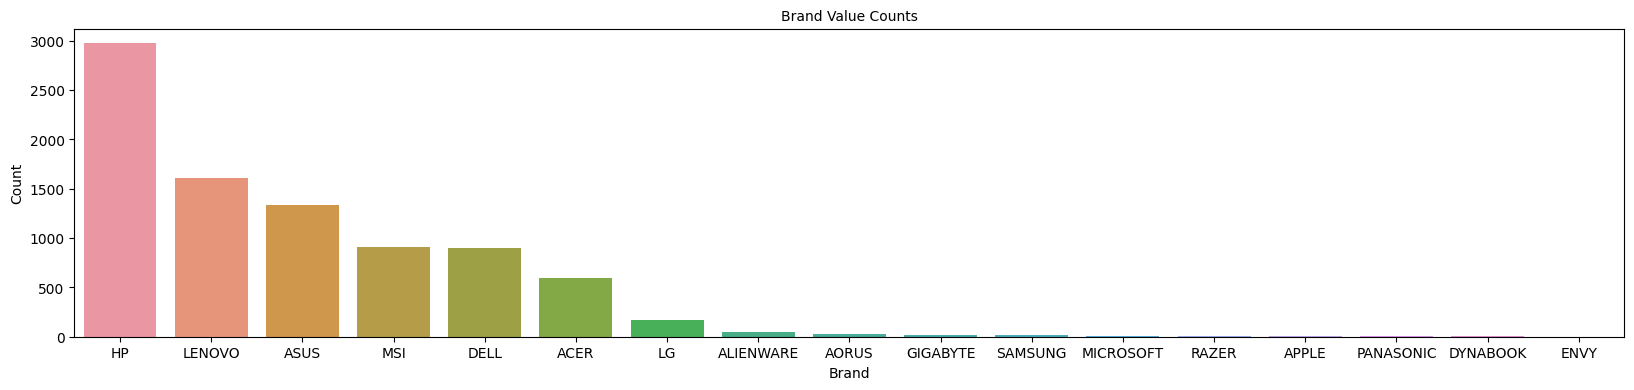

In [53]:
# plot brand value counts sorted
plt.figure(figsize=(20, 4))
sns.countplot(x = data['brand'], data = data, order = data['brand'].value_counts().index)
plt.title('Brand Value Counts')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

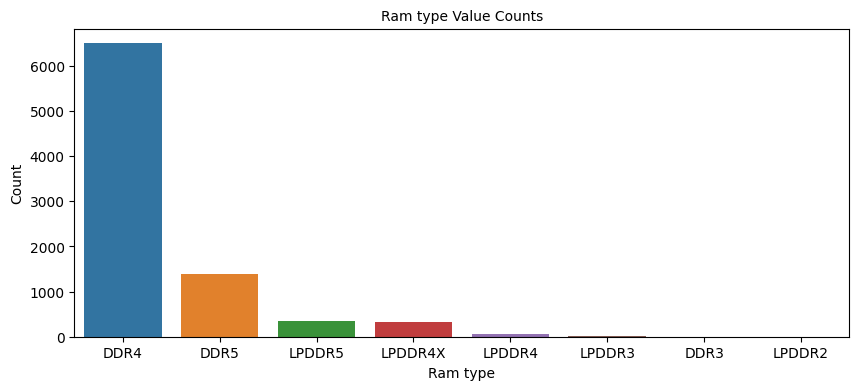

In [54]:
# plot brand value counts sorted
plt.figure(figsize=(10, 4))
sns.countplot(x=data['ram_type'], data=data,
              order=data['ram_type'].value_counts().index)
plt.title('Ram type Value Counts')
plt.xlabel('Ram type')
plt.ylabel('Count')
plt.show()

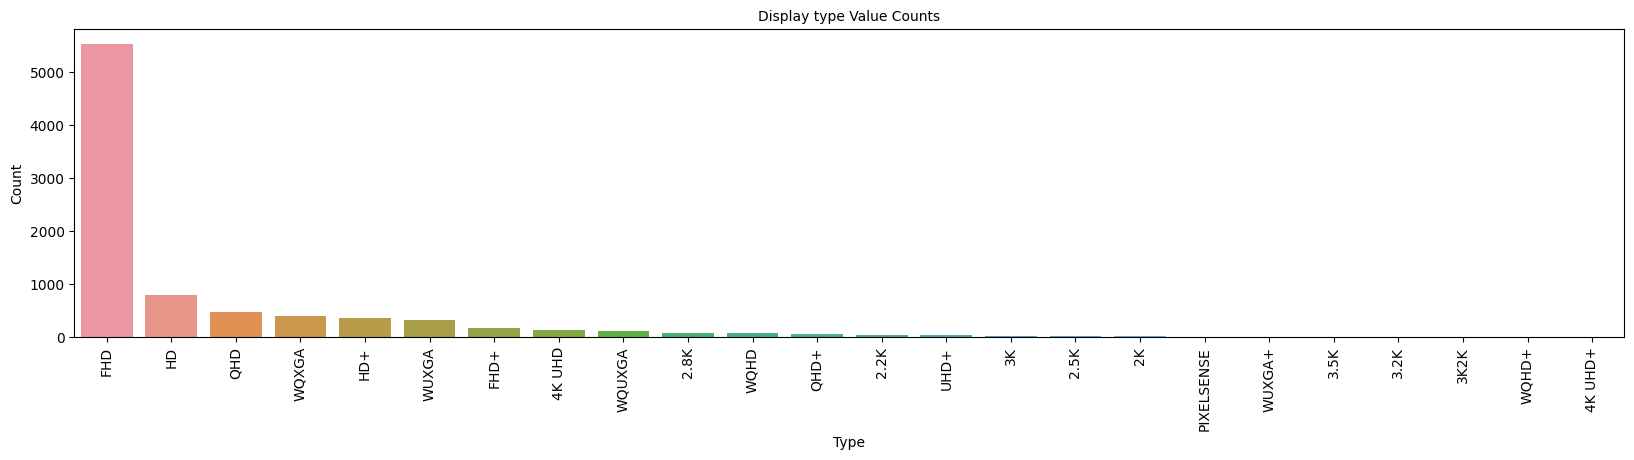

In [55]:
# plot brand value counts sorted
plt.figure(figsize=(20, 4))
sns.countplot(x=data['display_type'], data=data,
              order=data['display_type'].value_counts().index)
plt.title('Display type Value Counts')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


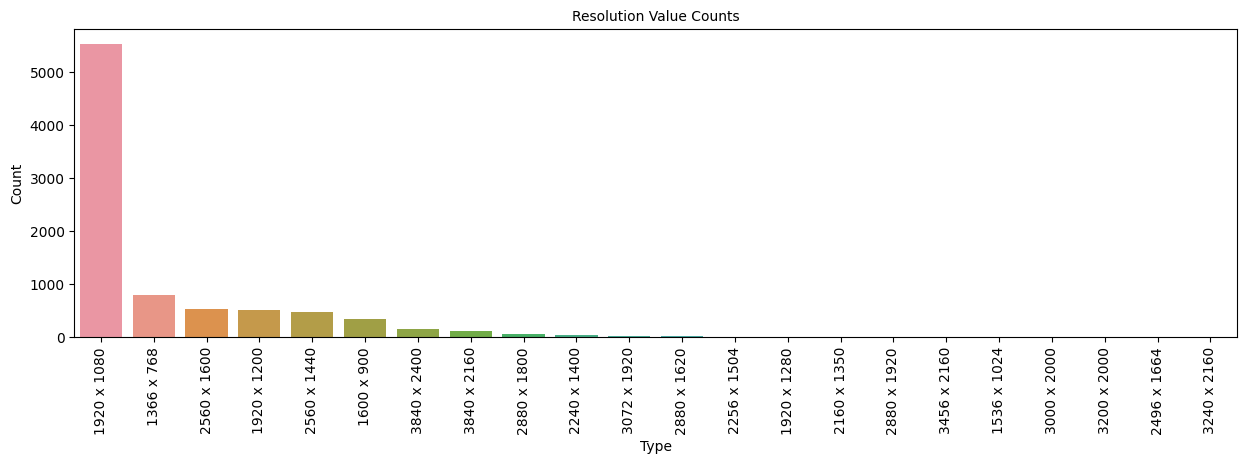

In [56]:
# plot brand value counts sorted
plt.figure(figsize=(15, 4))
sns.countplot(x=data['resolution'], data=data, order=data['resolution'].value_counts().index)
plt.title('Resolution Value Counts')
plt.xlabel('Type')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()


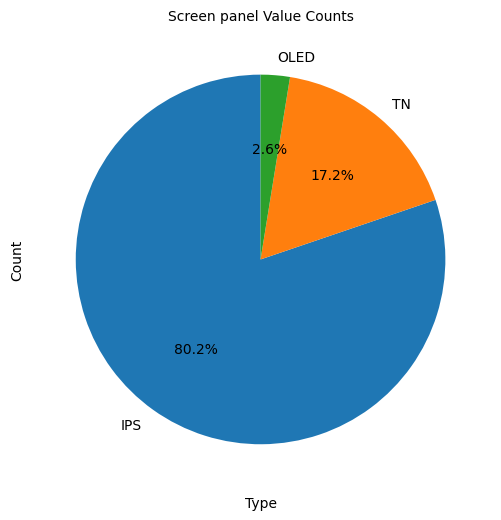

In [57]:
# plot brand value counts sorted
plt.figure(figsize=(15, 6))

plt.pie(data['screen_panel'].value_counts(), labels=data['screen_panel'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Screen panel Value Counts')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


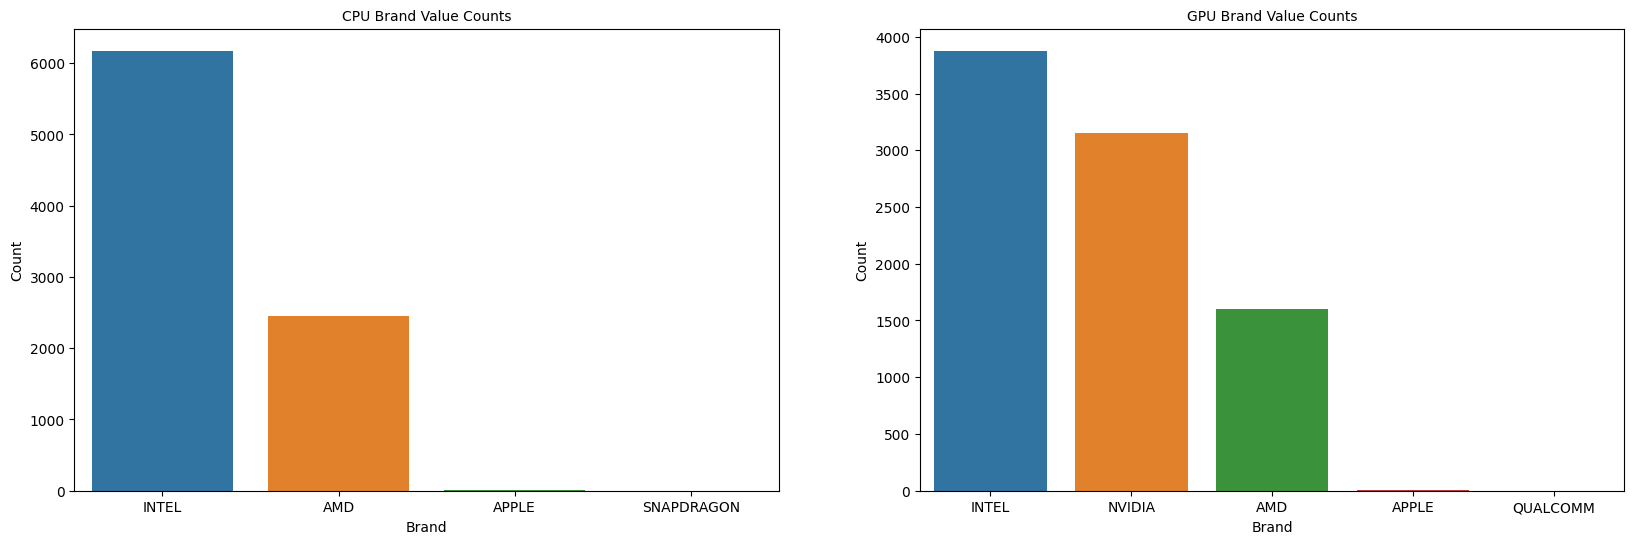

In [58]:
# create subplot of 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
# plot bar chart of CPU brand value counts using seaborn
sns.countplot(x=data['cpu_brand'], data=data,order=data['cpu_brand'].value_counts().index, ax=ax[0])
ax[0].set_title('CPU Brand Value Counts')
ax[0].set_xlabel('Brand')
ax[0].set_ylabel('Count')
# plot bar chart of GPU brand value counts
sns.countplot(x=data['gpu_brand'], data=data,
              order=data['gpu_brand'].value_counts().index, ax=ax[1])
ax[1].set_title('GPU Brand Value Counts')
ax[1].set_xlabel('Brand')
ax[1].set_ylabel('Count')
plt.show()


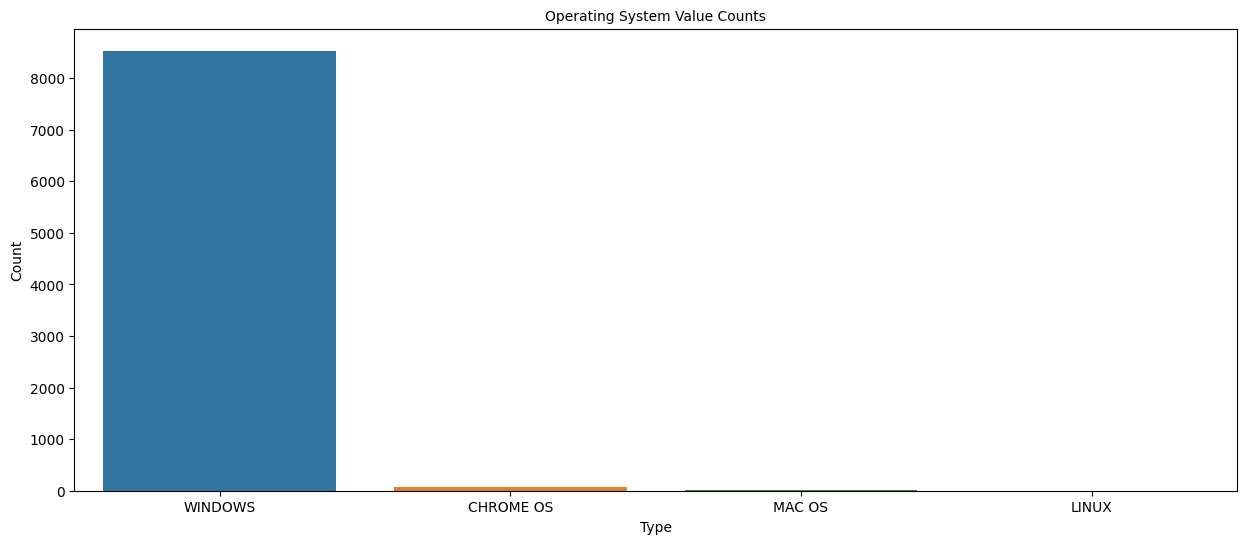

In [59]:
# plot brand value counts sorted
plt.figure(figsize=(15, 6))
sns.countplot(x=data['os'], data=data, order=data['os'].value_counts().index)
plt.title('Operating System Value Counts')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


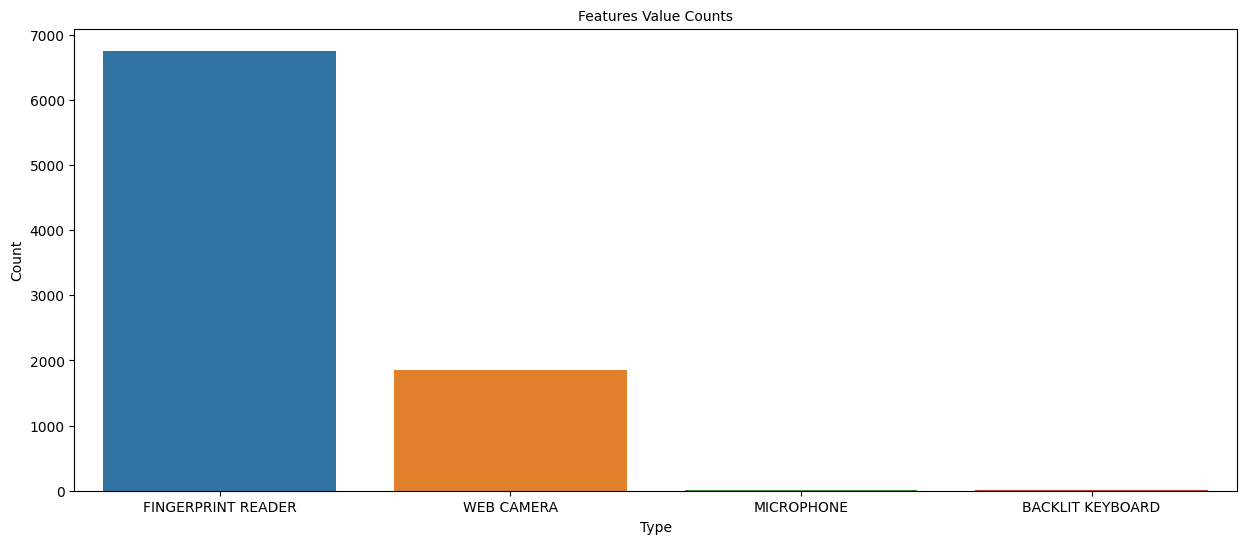

In [60]:
# plot brand value counts sorted
plt.figure(figsize=(15, 6))
sns.countplot(x=data['features'], data=data,
              order=data['features'].value_counts().index)
plt.title('Features Value Counts')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


## 3. Trực quan dữ liệu dạng numeric

In [61]:
num_data = data.drop(cat_cols, axis=1)
print('Numerical columns:')
for col in num_data.columns:
    print(col)

Numerical columns:
price
ram
display_size
screen_rate
length
width
thickness
ssd
weight
cpu_point
gpu_point


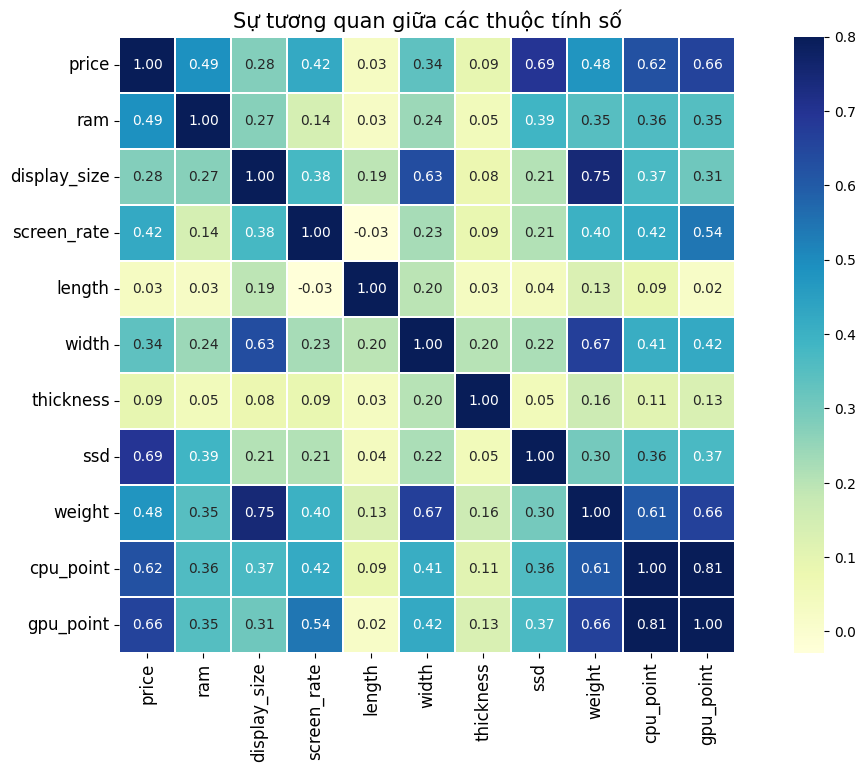

In [62]:
# plot heatmap for numerical columns
plt.figure(figsize=(15,8))
sns.heatmap(num_data.corr(), vmax=.8, linewidths=0.01, cbar=True, cmap='YlGnBu', linecolor="white", annot=True, square=True,
            fmt='.2f', annot_kws={'size': 10})
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Sự tương quan giữa các thuộc tính số', fontsize=15)
plt.show()


In [63]:
print("Top correlated features with price")
num_data.corr()['price'].sort_values(ascending=False).head(4)

Top correlated features with price


price        1.000000
ssd          0.694329
gpu_point    0.658742
cpu_point    0.622659
Name: price, dtype: float64

Text(0.5, 1.0, 'Sự tương quan giữa giá và dung lượng SSD')

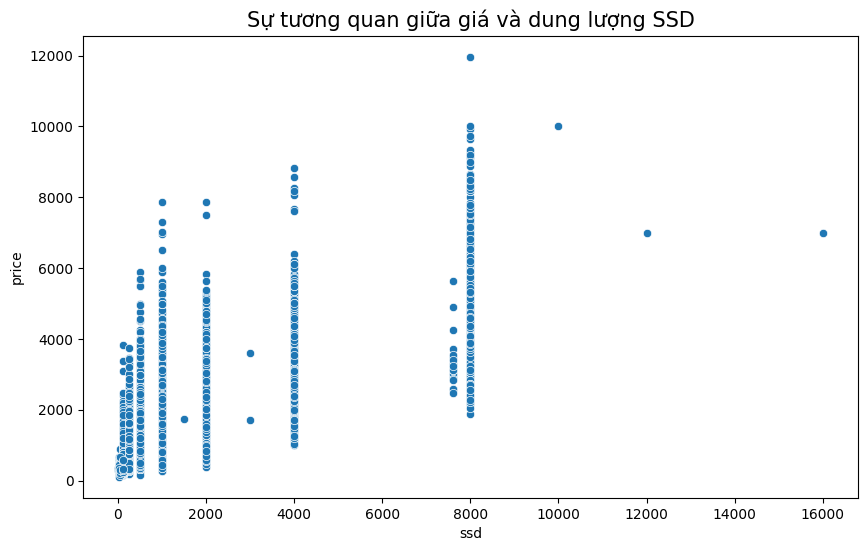

In [64]:
# plot scatter plot for price and ssd column
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['ssd'], y=data['price'], data=data['price'])
plt.title('Sự tương quan giữa giá và dung lượng SSD', fontsize=15)

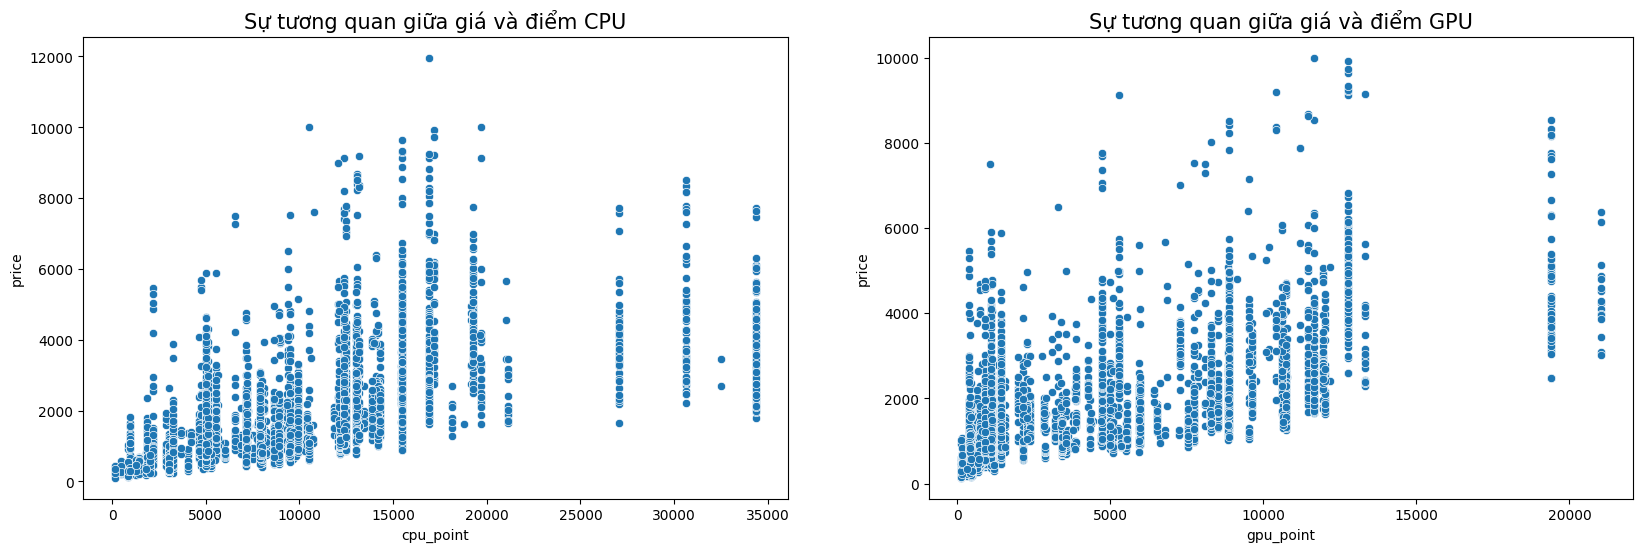

In [65]:
# create subplot of 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
# plot scatter plot for price and cpu_point column
sns.scatterplot(x=data['cpu_point'], y=data['price'], data=data['price'], ax=ax[0])
ax[0].set_title('Sự tương quan giữa giá và điểm CPU', fontsize=15)
# plot scatter plot for price and gpu_point column
sns.scatterplot(x=data['gpu_point'], y=data['price'], data=data['price'], ax=ax[1])
ax[1].set_title('Sự tương quan giữa giá và điểm GPU', fontsize=15)
plt.show()

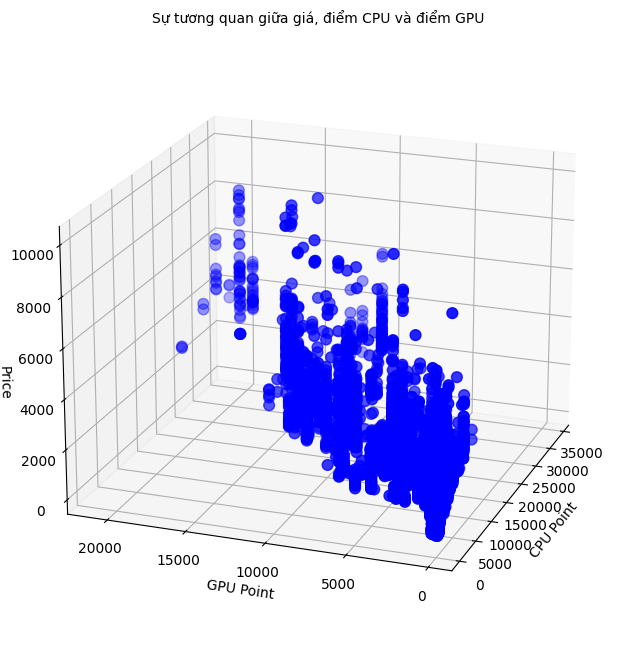

In [66]:
# plot 3d scatter plot for price, cpu_point and gpu_point
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['cpu_point'], data['gpu_point'], data['price'], c='blue', s=60)
ax.view_init(20, 200)

ax.set_xlabel('CPU Point')
ax.set_ylabel('GPU Point')
ax.set_zlabel('Price')
plt.title('Sự tương quan giữa giá, điểm CPU và điểm GPU', fontsize=10)
plt.show()


In [67]:
def plot_num_data(df, col):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
    sns.histplot(df[col], bins=50, ax=axes[0])
    # plot kde line
    sns.kdeplot(df[col], ax=axes[1])
    sns.boxplot(data=df, x=col, ax=axes[2])
    # plot mean line
    mean = df[col].mean()
    axes[0].axvline(mean, color='r', linestyle='--')
    axes[1].axvline(mean, color='r', linestyle='--')
    # set text size for axes
    for ax in axes:
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        # set labels size
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel('Count', fontsize=10)
    # set main title
    plt.suptitle(f'{col} Distribution', fontsize=15)
    plt.tight_layout()



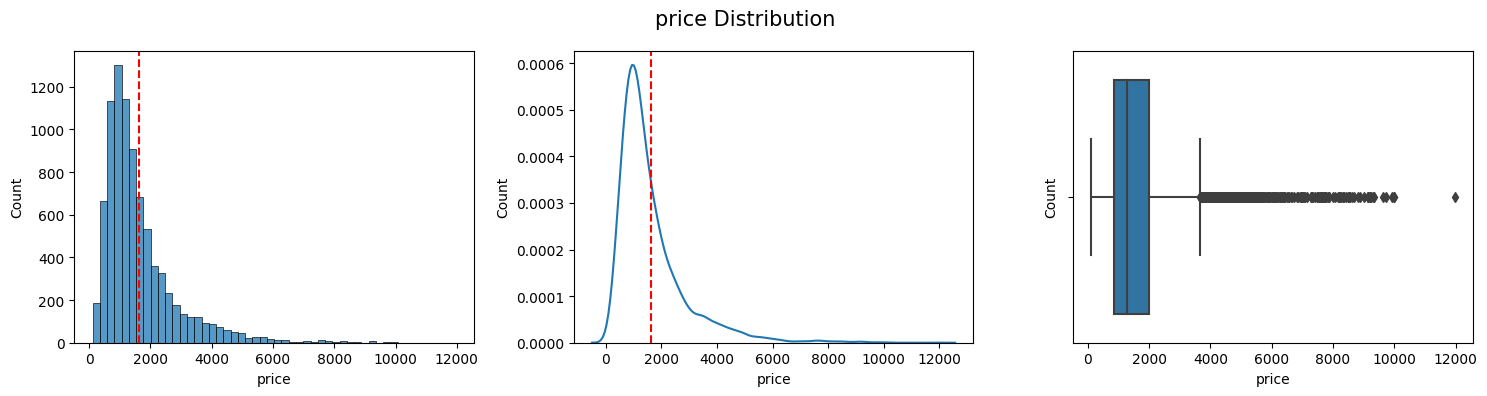

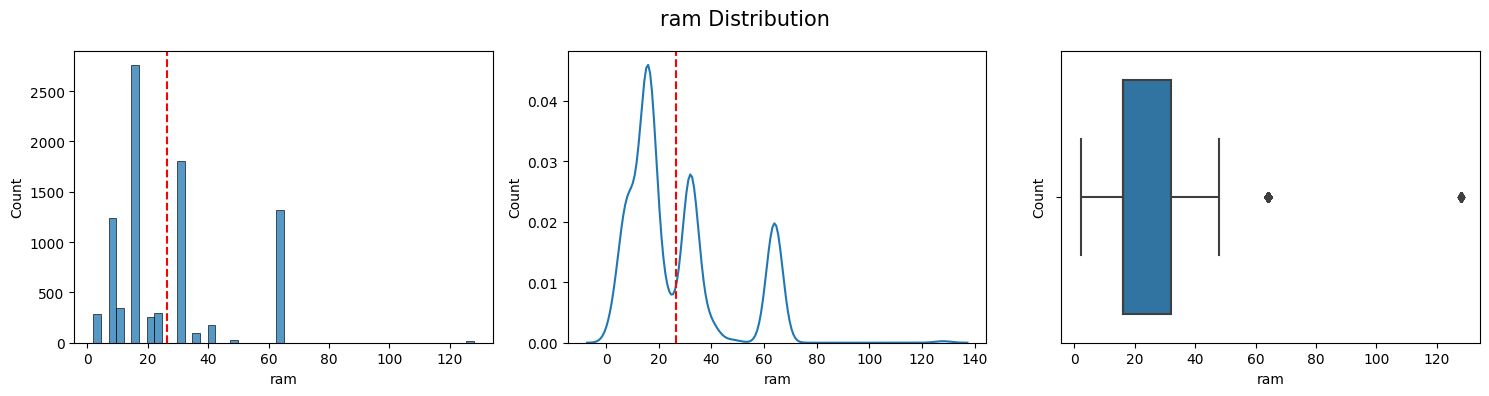

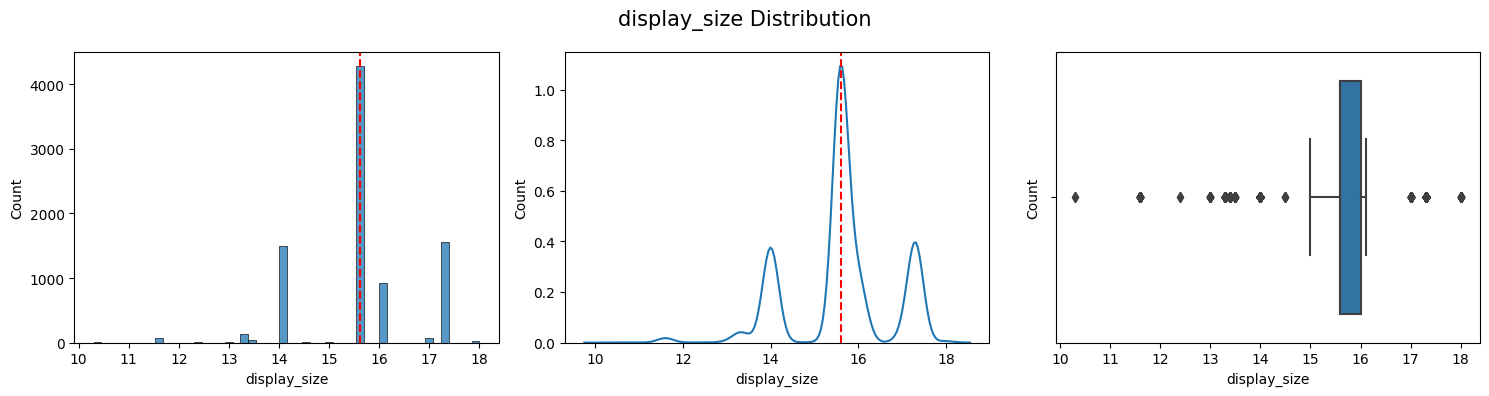

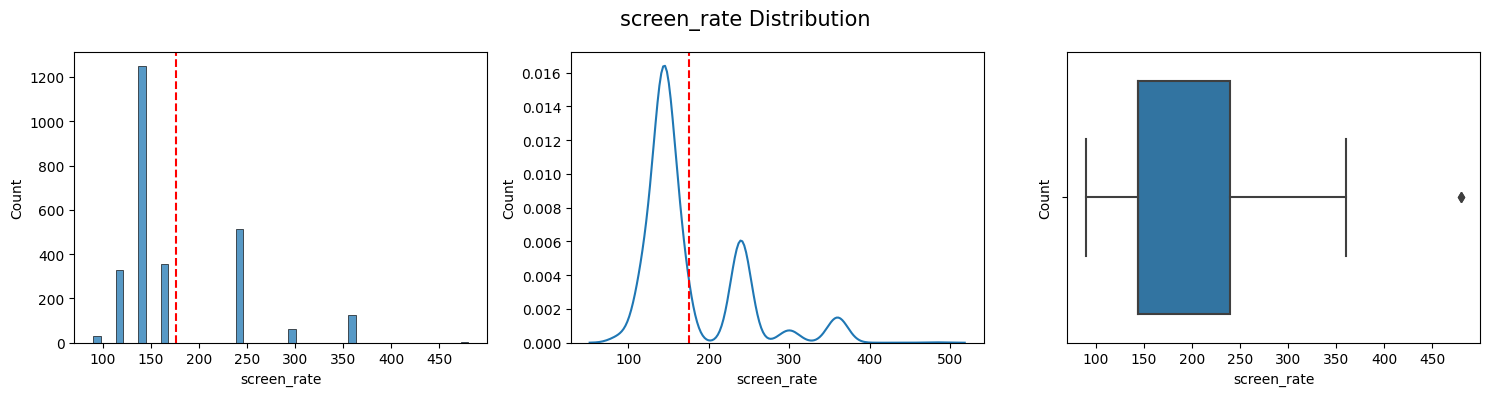

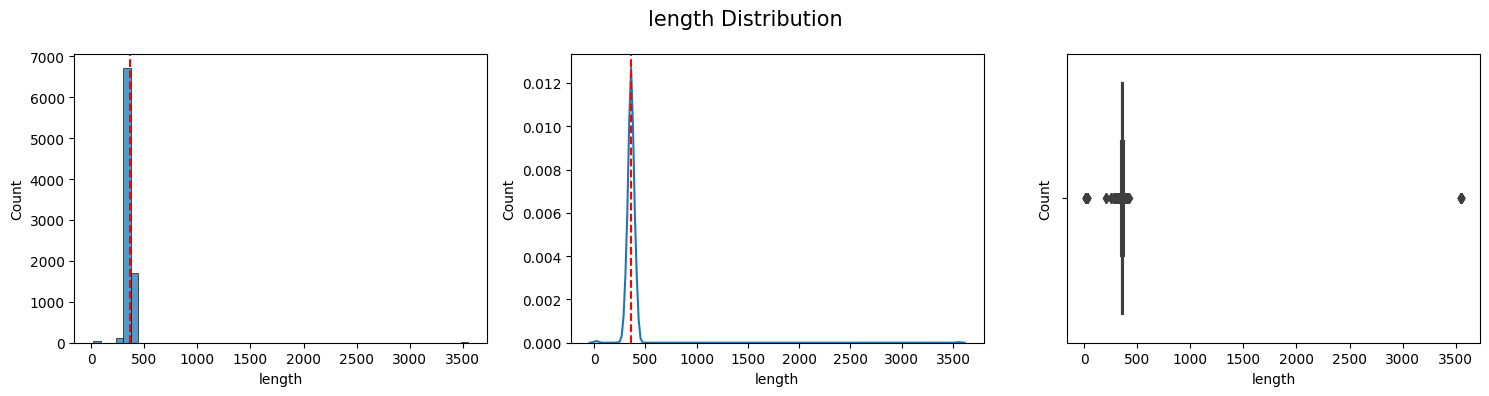

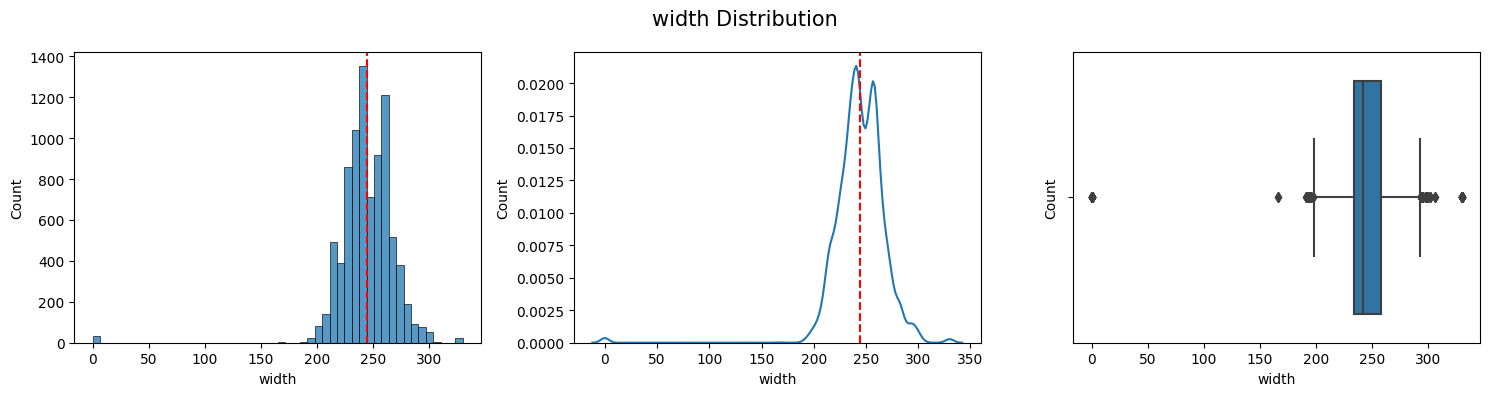

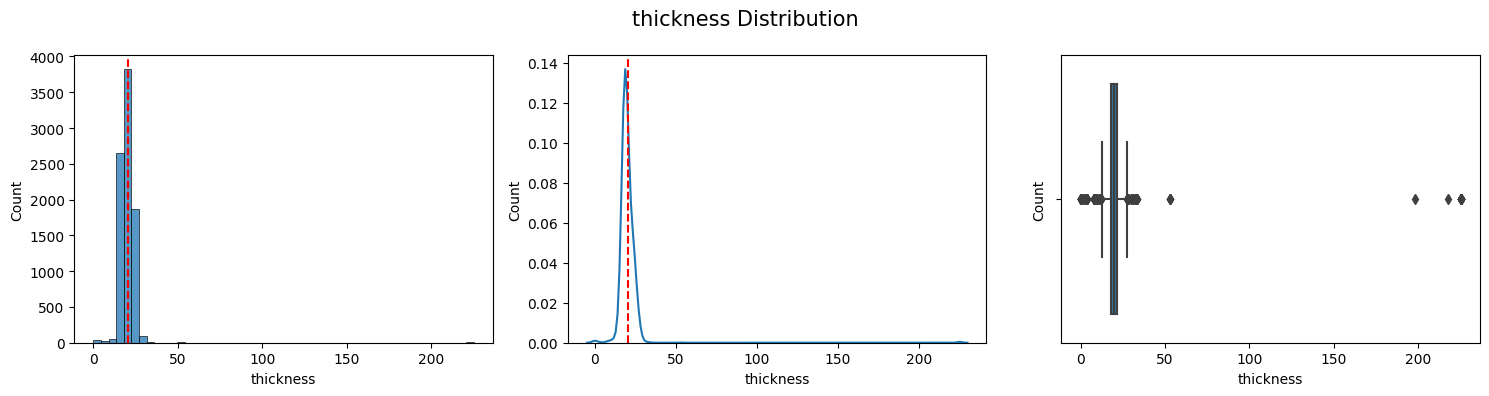

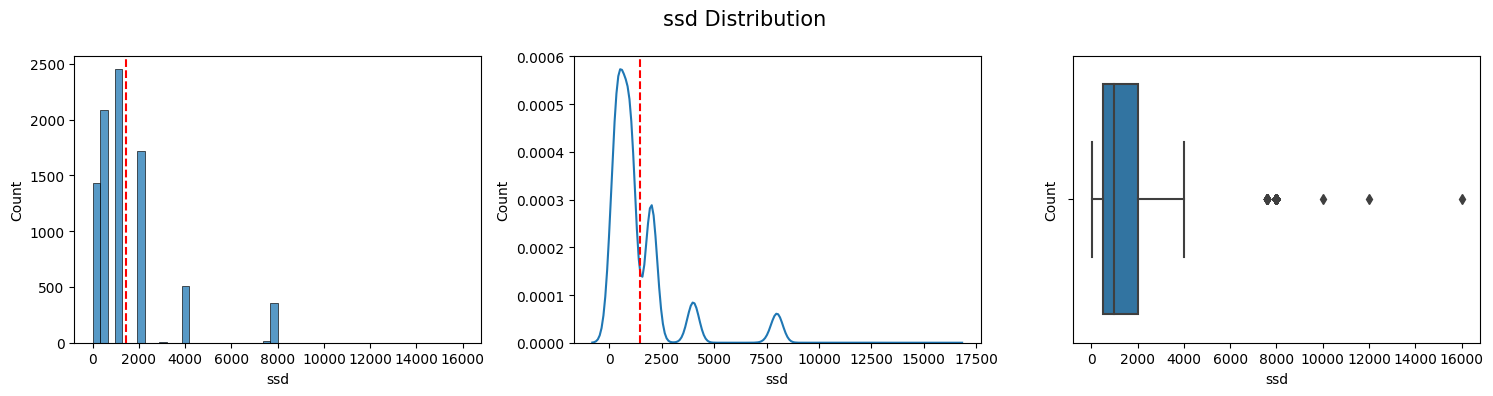

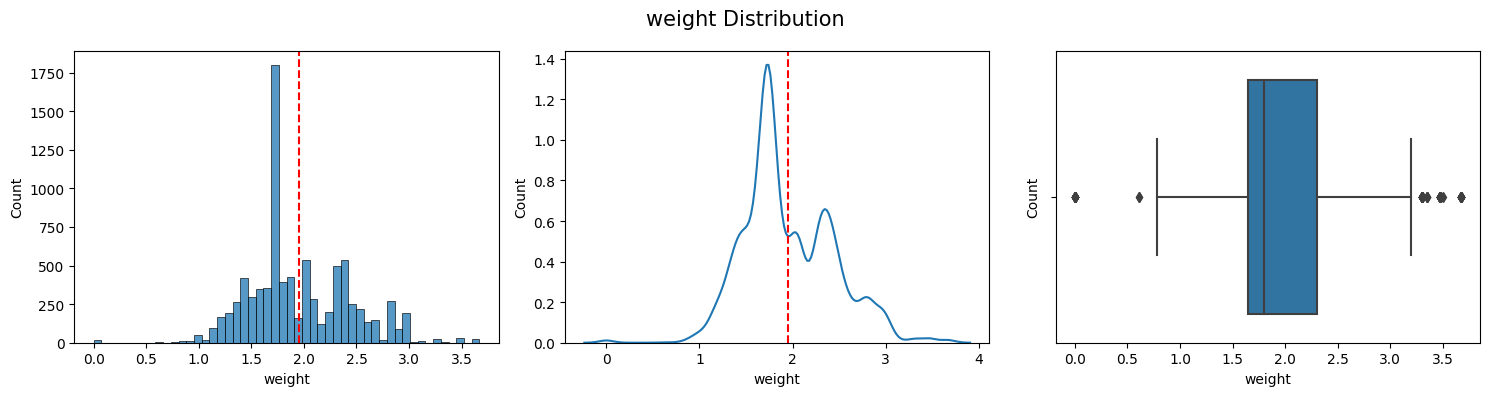

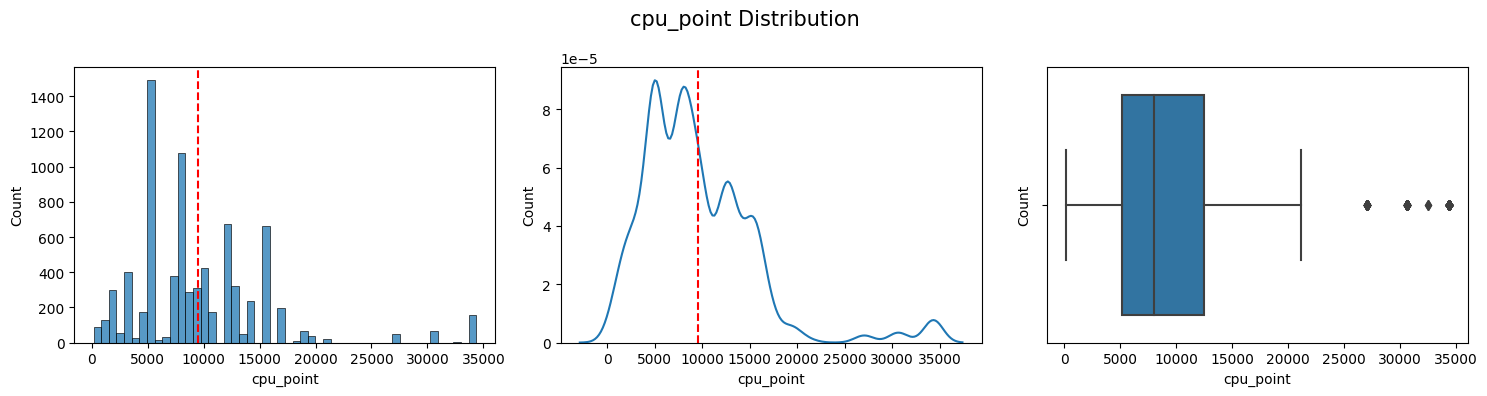

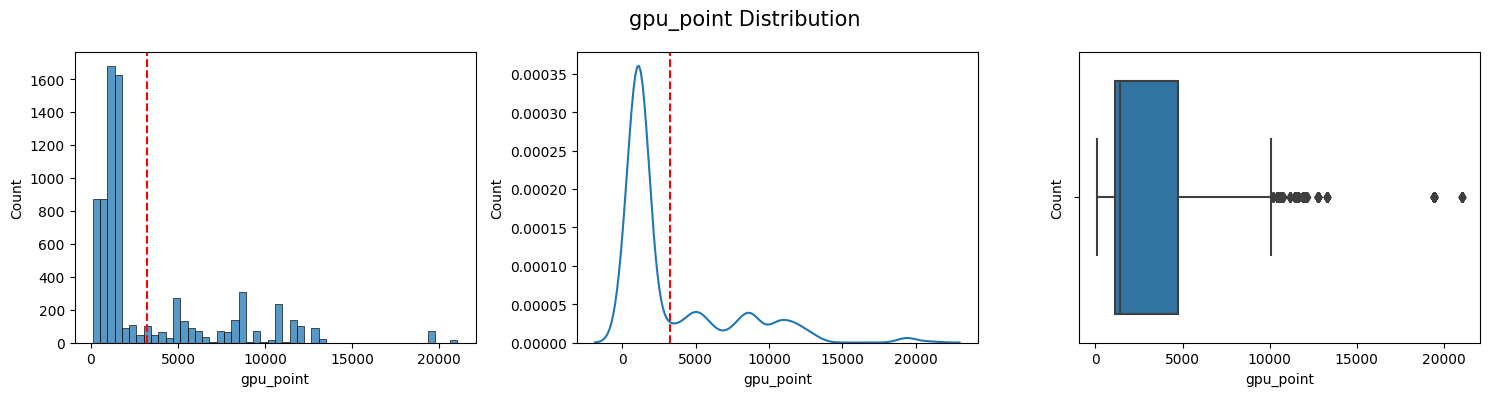

In [68]:
for col in num_data.columns:
    plot_num_data(data, col)
